# Environment Class Usage

Here we explore the different environment models available by default in RocketPy. Let's start by importing the rocketpy module.

In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.

In [2]:
%matplotlib inline

## Datetime

RocketPy requires date and time information specifying year, month, day and hour to properly forecast the weather. Alongside this data, a timezone may also be specified as follows.

In [3]:
env = Environment(date=(2022, 2, 16, 18), timezone="America/New_York")

It is also possible to omit the timezone, in which case RocketPy will assume the datetime is given in standard UTC time, as done in the examples that follow. 

## Elevation

The elevation of the launch site of a rocket is particularly important for determining its interaction with the atmosphere and Earth's gravitational field.

Sometimes, together with the latitude and longitude of the launch site, the elevation which is measured in meters above sea level is known and can be used to initialize an Environment class instance as follows.

In [4]:
env = Environment(
    date=(2019, 2, 10, 18),
    latitude=-21.960641,
    longitude=-47.482122,
    elevation=110,
)

However, this is not always the case. Lucky for us, there are alternatives to find an approximate value of the elevation of the launch site if the latitude and longitude values are know.

One option is to use the value supplied by some atmospheric models. Since elevation data is crucial for Numerical Weather Programing, some weather models make elevation data available together with other variables. But this will be covered later.

Another very useful and handy option is to use [Open-Elevation](https://open-elevation.com/), a free and open-source elevation API. It is built right into RocketPy and one can use it as follows.

First, we initialize a new Environment.

In [5]:
env = Environment(date=(2019, 2, 10, 18), latitude=-21.960641, longitude=-47.482122)

Then, we use the Environment.setElevation method with the input parameter as 'Open-Elevation'. Note, however, that Open-Elevation servers are not always available.

In [6]:
env.set_elevation('Open-Elevation')

Fetching elevation from open-elevation.com...
Elevation received: 651.0


To get information from the Environment, just use the Environment.info() or the Environment.all_info() methods.


Gravity Details

Acceleration of Gravity at Lauch Site: 9.785541145259767 m/s²


Launch Site Details

Launch Date: 2019-02-10 18:00:00 UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 243664.48 W    7569452.20 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 651.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 937.46 hPa
Surface Temperature: 283.93 K
Surface Air Density: 1.150 kg/m³
Surface Speed of Sound: 337.62 m/s


Atmospheric Model Plots



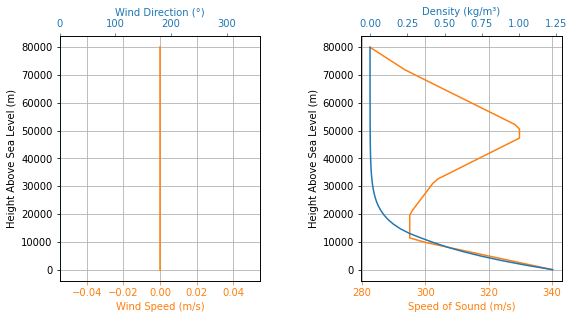

In [7]:
env.info()

### Using the Standard Atmosphere

By default, when initializing an environment class, the International Standard Atmosphere as defined by ISO 2533 is initialized.

Note that the International Standard Atmosphere only has temperature and pressure profiles properly specified. Other profiles can be derived from it, however, winds are automatically set to 0 m/s.

In [8]:
EnvISA = Environment()


Gravity Details

Acceleration of Gravity at Lauch Site: 9.7803253359 m/s²


Launch Site Details

Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 1013.25 hPa
Surface Temperature: 288.15 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 340.29 m/s


Atmospheric Model Plots



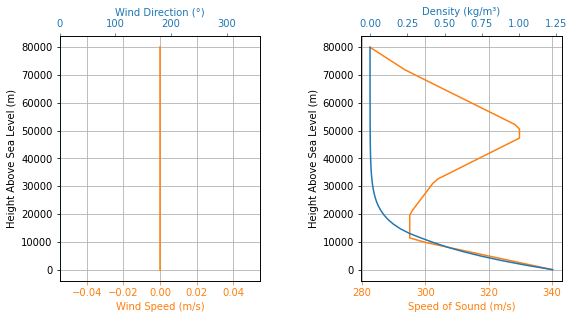

In [9]:
EnvISA.info()

The International Standard Atmosphere can also be reset at any time by using the following method.

In [10]:
EnvISA.set_atmospheric_model(type="standard_atmosphere")

### Using a Custom Atmosphere

The user can also set a completely customized atmosphere. This is particularly useful for setting custom values of wind in both directions.

First, we initialize a new Environment.

In [11]:
EnvCA = Environment()

Then, we set the atmospheric model as 'custom_atmosphere'.

Leaving the pressure field as None means we want the International Standard Atmosphere's pressure profile to be used. We could have done the same with temperature, but to showcase how floats can be used, we set the temperature field as a constant 300 K profile.

For the wind, we need to specify its value in both U (east) and V (north) direction. In this case, we used arrays to specify points. Consider a wind U profile of 5 m/s at 0 m and 10 m/s at 1000 m. For the wind V, we used -2 m/s at 0 m, 3 m/s at 500 m and 2 m/s at 1000 m.

In [12]:
EnvCA.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=[(0, 5), (1000, 10)],
    wind_v=[(0, -2), (500, 3), (1600, 2)],
)


Gravity Details

Acceleration of Gravity at Lauch Site: 9.7803253359 m/s²


Launch Site Details

Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 1.600 km


Surface Atmospheric Conditions

Surface Wind Speed: 5.39 m/s
Surface Wind Direction: 291.80°
Surface Wind Heading: 111.80°
Surface Pressure: 1013.25 hPa
Surface Temperature: 300.00 K
Surface Air Density: 1.177 kg/m³
Surface Speed of Sound: 347.22 m/s



Gravity Model Plots


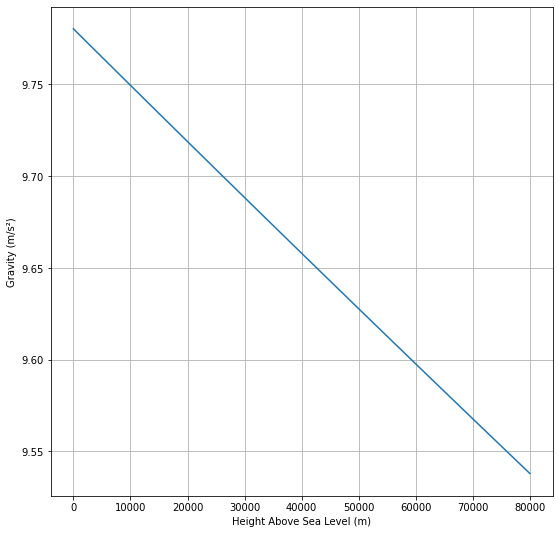



Atmospheric Model Plots


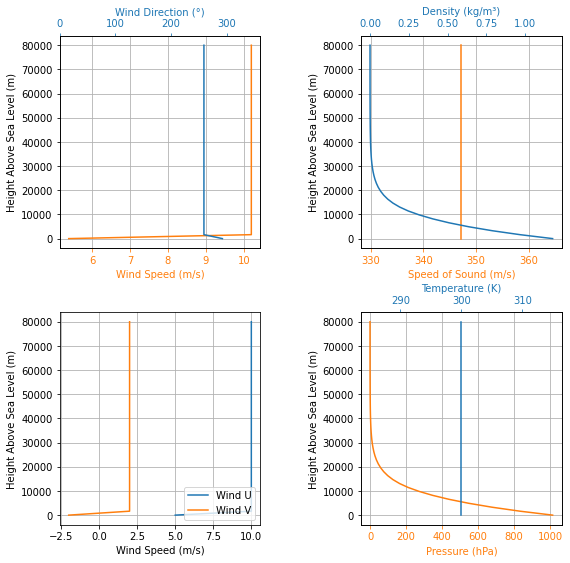

In [13]:
EnvCA.all_info()

Keep in mind that importing .csv files for Custom Atmospheres is also possible. See the documentation on Environment.set_atmospheric_model for more information.

### Using Wyoming Upper Air Soundings

Another option to define atmospheric conditions is to use upper air soundings. The University of Wyoming - College of Engineering - Department of Atmospheric Sciences has a great compilation of atmospheric soundings on their website which can be found [here](http://weather.uwyo.edu/upperair/sounding.html).

For this example, we will use the sounding from 83779 SBMT Marte Civ Observations at 00Z 04 Feb 2019 which can be accessed using the URL generated by the above website: [http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779](http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779).

First, we initialize a new Environment. There is no need to specify dates, latitude and longitude here, so we will skip them for know.

In [14]:
EnvWUAS = Environment()

Now, we set use the URL above as the input to our atmospheric model.

In [15]:
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"

EnvWUAS.set_atmospheric_model(type="wyoming_sounding", file=URL)

Next, notice how even though we have not specified a surface elevation for our Environment, it has one set! The reason is that Wyoming Upper Air Soundings have elevation data for the sounding station, which is used to set the elevation of the Environment. If you do not want this elevation, you can change using Environment.setElevation(desired elevation in meters).


Gravity Details

Acceleration of Gravity at Lauch Site: 9.778096408189615 m/s²


Launch Site Details

Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 722.0 m


Atmospheric Model Details

Atmospheric Model Type: wyoming_sounding
wyoming_sounding Maximum Height: 22.077 km


Surface Atmospheric Conditions

Surface Wind Speed: 3.09 m/s
Surface Wind Direction: 110.00°
Surface Wind Heading: 290.00°
Surface Pressure: 936.00 hPa
Surface Temperature: 291.75 K
Surface Air Density: 1.118 kg/m³
Surface Speed of Sound: 342.41 m/s



Gravity Model Plots


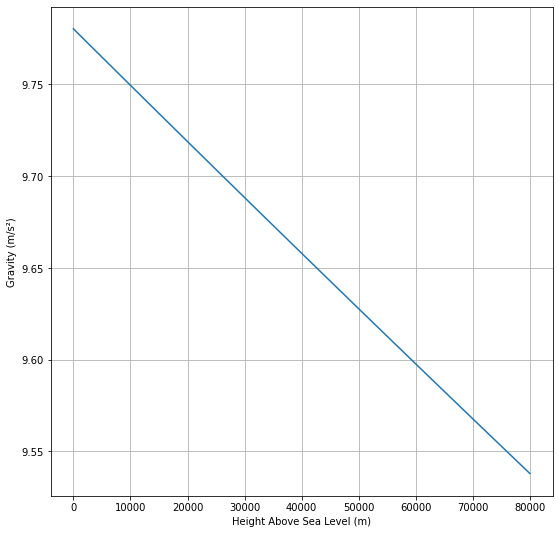



Atmospheric Model Plots


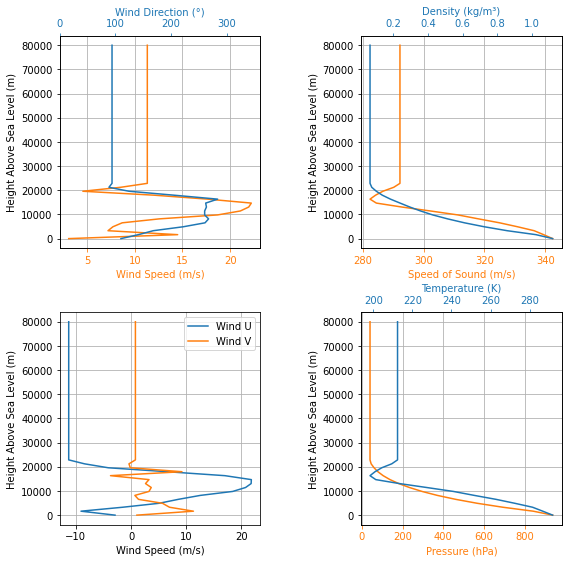

In [16]:
EnvWUAS.all_info()

### Using NOAA's Ruc Soundings
Another option for upper air soundings is [NOAA's Ruc Soundings](https://rucsoundings.noaa.gov/) servers. It allows users to download virtual soundings from numerical weather prediction models such as GFS, RAP and NAM, and also allow for the download of real soundings from the Integrated Global Radiosonde Archive (IGRA).

All of these options can be retrieved as a text file which follows the GSD format. By generating such a file through the link above, the file's URL can be used to import the atmospheric data into RocketPy.

We will use the same sounding station as we did for Wyoming Soundings. Selecting ROABs as the initial data source, specifying the station through it's WMO-ID and opting for the ASCII (GSD format) button, the following page opens up: [https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest](https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest)

Let's initialize a new Environment to use this as it's source for atmospheric conditions. There is no need to specify dates, latitude and longitude here as well, so we will skip them for know.

In [17]:
EnvRUC = Environment()

In [18]:
URL = "https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest"

EnvRUC.set_atmospheric_model(type="NOAARucSounding", file=URL)


Gravity Details

Acceleration of Gravity at Lauch Site: 9.778096408189615 m/s²


Launch Site Details

Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 722.0 m


Atmospheric Model Details

Atmospheric Model Type: NOAARucSounding
NOAARucSounding Maximum Height: 20.116 km


Surface Atmospheric Conditions

Surface Wind Speed: 1.03 m/s
Surface Wind Direction: 180.00°
Surface Wind Heading: 0.00°
Surface Pressure: 936.00 hPa
Surface Temperature: 294.75 K
Surface Air Density: 1.106 kg/m³
Surface Speed of Sound: 344.17 m/s



Gravity Model Plots


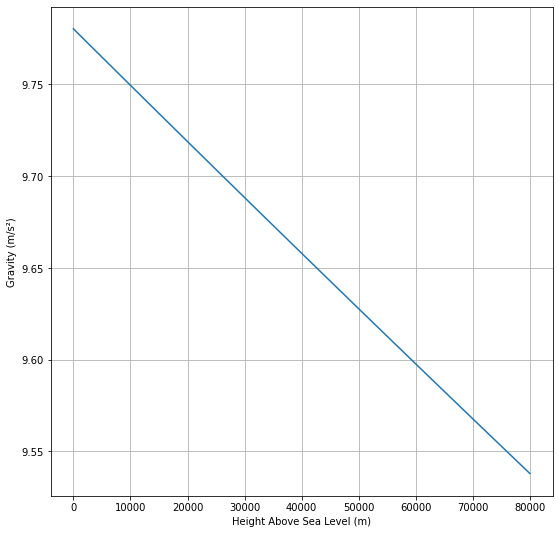



Atmospheric Model Plots


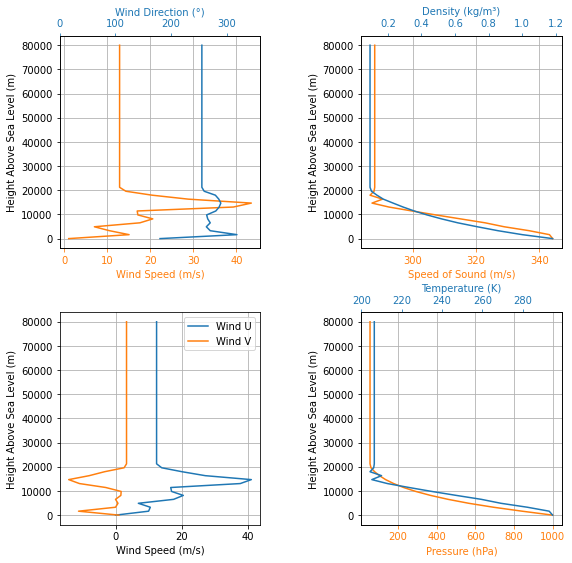

In [19]:
EnvRUC.all_info()

### Using Weather Forecasts and Reanalysis

Weather Forecasts and Reanalysis can also be used to set the atmospheric model. Here we will showcase how to import global forecasts such as GFS and also local forecasts such as NAM and RAP for North America, all of these available through OPeNDAP in the [NOAA's NCEP NOMADS](http://nomads.ncep.noaa.gov/) website. Keep in mind that other generic forecasts can also be imported.

Furthermore, reanalysis such as ERA5, which can be easily downloaded from [ECMWF's Climate Data Store](https://cds.climate.copernicus.eu/#!/home), will also be showcased.

#### Setting up Date, Latitude and Longitude

All Environments which use weather forecasts or reanalysis must have date, latitude and longitude set up correctly during or after initialization in order for everything to work smoothly.

Let's first initialize a new Environment for the GFS weather forecast by specifying date, latitude and longitude during initialization. Keep in mind that date is specified using UTC time in year, month, day, UTC hour format.

In [20]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

date_info = (tomorrow.year, tomorrow.month, tomorrow.day, 9)  # Hour given in UTC time

print("Tomorrow's date:", date_info)

Tomorrow's date: (2023, 8, 12, 9)


In [21]:
EnvGFS = Environment(date=date_info, latitude=-21.960641, longitude=-47.482122)

Another approach is to specify date, latitude and longitude values after initialization. Let's do this when creating a new Environment instance that will be using the NAM weather forecast.

In [22]:
EnvNAM = Environment()

In [23]:
EnvNAM.set_date(date_info)

In [24]:
EnvNAM.set_location(-21.960641, -47.482122)

#### GFS

Using the latest forecast from GFS is really simple. All we need to do is specify that GFS is the forecast we want. Note that since data is downloaded from NOMADS server, this line of code can take longer than usual.

In [25]:
EnvGFS.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.785478852100368 m/s²


Launch Site Details

Launch Date: 2023-08-12 09:00:00 UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 243664.48 W    7569452.20 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 671.2 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.272 km
Forecast Time Period: From  2023-08-11 12:00:00  to  2023-08-27 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.47 m/s
Surface Wind Direction: 95.72°
Surface Wind Heading: 275.72°
Surface Pressure: 940.78 hPa
Surface Temperature: 295.08 K
Surface Air Density: 1.111 kg/m³
Surface Speed of Sound: 344.36 m/s



Gravity Model Plots


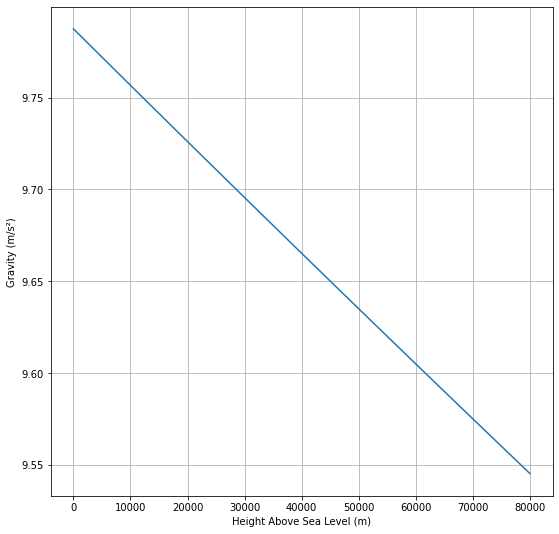



Atmospheric Model Plots


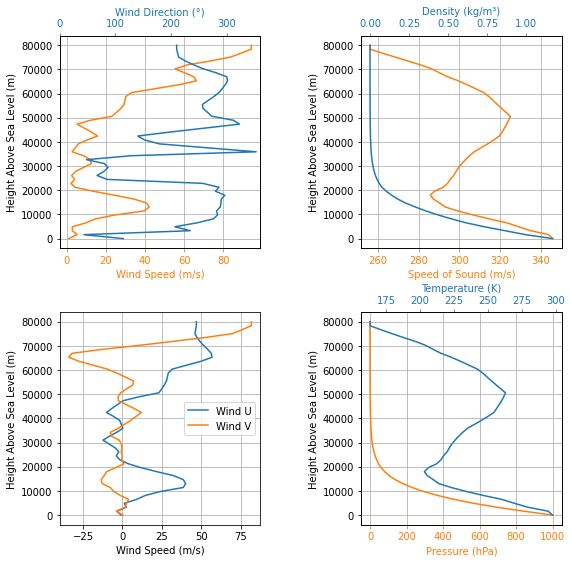

In [26]:
EnvGFS.all_info()

#### NAM and RAP

We can also request the latest forecasts from NAM and RAP. Since they are regional models for North America, we need to specify latitude and longitude points in North America. We will use [SpacePort America](https://www.google.com/maps/place/32°59'18.7%22N+106°58'30.2%22W/@32.9885323,-106.9772443,800m/data=!3m2!1e3!4b1!4m13!1m6!3m5!1s0x86df9591b4145bf9:0x19c787f1198f25cf!2sSpaceport+America!8m2!3d32.9903796!4d-106.975041!3m5!1s0x0:0x0!7e2!8m2!3d32.9885168!4d-106.9750625) for this, represented by coordinates 32.988528, -106.975056 or 32°59'18.7"N 106°58'30.2"W.

In [27]:
EnvNAM = Environment(date=date_info, latitude=32.988517, longitude=-106.975062)

EnvRAP = Environment(date=date_info, latitude=32.988517, longitude=-106.975062)

In [28]:
EnvNAM.set_atmospheric_model(type="Forecast", file="NAM")

EnvRAP.set_atmospheric_model(type="Forecast", file="RAP")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.791284255443486 m/s²


Launch Site Details

Launch Date: 2023-08-12 09:00:00 UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315459.04 W    3651746.15 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1415.4 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 31.642 km
Forecast Time Period: From  2023-08-11 18:00:00  to  2023-08-14 06:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  21.140671 ° To  52.61339827273 °
Forecast Longitude Range: From  -134.096127 ° To  -60.93723597484 °


Surface Atmospheric Conditions

Surface Wind Speed: 2.65 m/s
Surface Wind Direction: 263.06°
Surface Wind Heading: 83.06°
Surface Pressure: 861.50 hPa
Surface Temperature: 294.74 K
Surface Air Density: 1.018 kg/m³
Surface Speed of Sound: 344.16 m/s


Atmospheric Model Plots



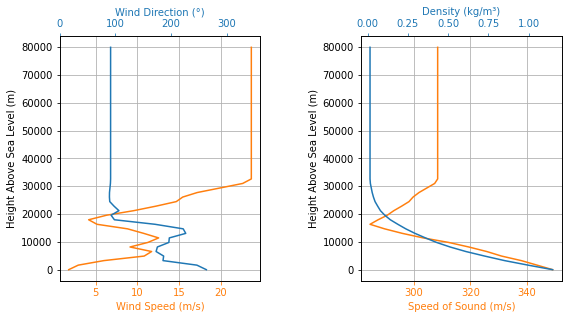

In [29]:
EnvNAM.info()


Gravity Details

Acceleration of Gravity at Lauch Site: 9.791069448766502 m/s²


Launch Site Details

Launch Date: 2023-08-12 09:00:00 UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315459.04 W    3651746.15 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1485.0 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 16.760 km
Forecast Time Period: From  2023-08-11 21:00:00  to  2023-08-12 18:00:00  UTC
Forecast Hour Interval: 1  hrs
Forecast Latitude Range: From  16.322011 ° To  58.25097463636 °
Forecast Longitude Range: From  -139.856603 ° To  -57.49840949379 °


Surface Atmospheric Conditions

Surface Wind Speed: 3.30 m/s
Surface Wind Direction: 20.02°
Surface Wind Heading: 200.02°
Surface Pressure: 853.48 hPa
Surface Temperature: 296.16 K
Surface Air Density: 1.004 kg/m³
Surface Speed of Sound: 344.99 m/s


Atmospheric Model Plots



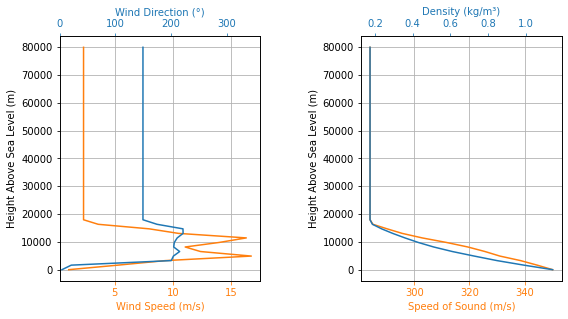

In [30]:
EnvRAP.info()

#### ERA-5 Reanalysis

Using data from ERA-5 reanalysis is as simple as specifying the file location and the dictionary to be used. This is much faster since the data has already been downloaded and is stored locally.

In [31]:
EnvERA = Environment(
    date=(2018, 2, 17, 18),
    latitude=32.988517,
    longitude=-106.975062,
    elevation=1400,
)

In [32]:
EnvERA.set_atmospheric_model(
    type="Reanalysis",
    file="../../../data/weather/SpaceportAmerica_2018_ERA-5.nc",
    dictionary="ECMWF",
)


Gravity Details

Acceleration of Gravity at Lauch Site: 9.791331652638586 m/s²


Launch Site Details

Launch Date: 2018-02-17 18:00:00 UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315459.04 W    3651746.15 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1400.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.366 km
Reanalysis Time Period: From  2018-01-01 00:00:00  to  2018-12-31 18:00:00  UTC
Reanalysis Hour Interval: 6  hrs
Reanalysis Latitude Range: From  34.5 ° To  31.5 °
Reanalysis Longitude Range: From  252.0 ° To  254.25 °


Surface Atmospheric Conditions

Surface Wind Speed: 2.41 m/s
Surface Wind Direction: 1.56°
Surface Wind Heading: 181.56°
Surface Pressure: 864.76 hPa
Surface Temperature: 282.81 K
Surface Air Density: 1.065 kg/m³
Surface Speed of Sound: 337.13 m/s


Atmospheric Model Plots



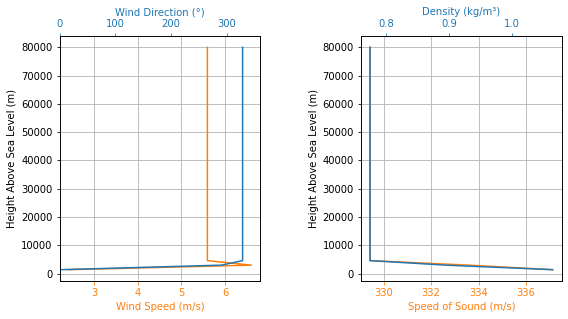

In [33]:
EnvERA.info()

#### Other Weather Forecasts or Reanalysis - HIRESW

We can use other forecasts or reanalysis as well. As an example, we will use the [HIRESW CONUS](http://nomads.ncep.noaa.gov/txt_descriptions/HIRES_doc.shtml) forecast available at [NOAA's NCEP NOMADS](http://nomads.ncep.noaa.gov/) website.

In [34]:
import datetime

today = datetime.date.today()
date_info = (today.year, today.month, today.day, 12)  # Hour given in UTC time
print("Today's date:", date_info)

EnvHIRESW = Environment(date=date_info, latitude=32.988517, longitude=-106.975062)

Today's date: (2023, 8, 11, 12)


This model can be accessed through the following link: [https://nomads.ncep.noaa.gov:9090/dods/hiresw/hiresw20190206/hiresw_conusarw_12z](https://nomads.ncep.noaa.gov:9090/dods/hiresw/hiresw20190206/hiresw_conusarw_12z).

Since it is available from NOAA's NCEP NOMADS, we could use the NOAA dictionary However, we will create one from scratch to showcase the methodology.

The variables from the dataset can also be seen through the link above. We need to determine the name used by the model of the following dimensions and variables:

- Time
- Latitude
- Longitude
- Pressure Levels
- Geopotential Height (as a function of Time, Pressure Levels, Latitude and Longitude)
- Surface Geopotential Height (as a function of Time, Latitude and Longitude)
- Wind - U Component (as a function of Time, Pressure Levels, Latitude and Longitude)
- Wind - V Component (as a function of Time, Pressure Levels, Latitude and Longitude)

Looking through the variable list in the link above, we find the following correspondence:

- Time = **'time'**
- Latitude = **'lat'**
- Longitude = **'lon'**
- Pressure Levels = **'lev'**
- Geopotential Height = **'hgtprs'**
- Surface Geopotential Height = **'hgtsfc'**
- Wind - U Component = **'ugrdprs'**
- Wind - V Component = **'vgrdprs'**

Therefore, we use the dictionary shown below.

In [35]:
HIRESW_dictionary = {
    "time": "time",
    "latitude": "lat",
    "longitude": "lon",
    "level": "lev",
    "temperature": "tmpprs",
    "surface_geopotential_height": "hgtsfc",
    "geopotential_height": "hgtprs",
    "u_wind": "ugrdprs",
    "v_wind": "vgrdprs",
}

This dictionary can then be used in the Environment.set_atmospheric_model method.

In [36]:
date_string = f"{date_info[0]}{date_info[1]:02}{date_info[2]:02}"
print("Today's date string:", date_string)

EnvHIRESW.set_atmospheric_model(
    type="Forecast",
    file=f"https://nomads.ncep.noaa.gov/dods/hiresw/hiresw{date_string}/hiresw_conusarw_12z",
    dictionary=HIRESW_dictionary,
)

Today's date string: 20230811



Gravity Details

Acceleration of Gravity at Lauch Site: 9.79128516880994 m/s²


Launch Site Details

Launch Date: 2023-08-11 12:00:00 UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315459.04 W    3651746.15 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1415.1 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 12.494 km
Forecast Time Period: From  2023-08-11 12:00:00  to  2023-08-13 12:00:00  UTC
Forecast Hour Interval: 1  hrs
Forecast Latitude Range: From  12.202469 ° To  61.23790536364 °
Forecast Longitude Range: From  -152.852997 ° To  -49.40219446122 °


Surface Atmospheric Conditions

Surface Wind Speed: 2.86 m/s
Surface Wind Direction: 163.98°
Surface Wind Heading: 343.98°
Surface Pressure: 860.83 hPa
Surface Temperature: 293.56 K
Surface Air Density: 1.022 kg/m³
Surface Speed of Sound: 343.47 m/s


Atmospheric Model Plots



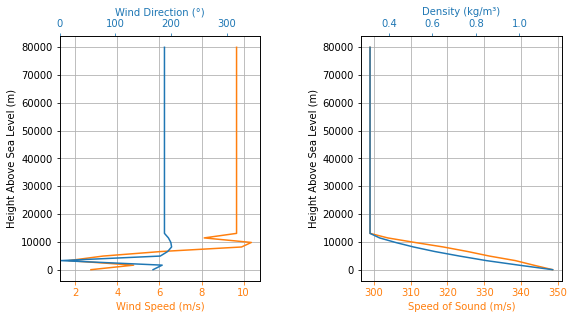

In [37]:
EnvHIRESW.info()

### Using Windy Atmosphere

*Windy.com* is a website that lets you see and get weather and atmospheric forecasts in any place in the world.
The same atmospheric predictions and data that are available on *windy.com* can be set as an atmospheric model in RocketPy.

A few different models are accepted:

- *ECMWF-HRES*
- *GFS*
- *ICON-Global*
- *ICON-EU*.

#### Setting up Date, latitude and Longitude

Just like when using Forecasts and Reanalysis, all Environments which use windy must have date, latitude and longitude set up correctly during or after initialization in order for everything to work smoothly.

Lets first initialize a few different Envioronmets with the same date. Each one for a different atmospheric model.

In [38]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

date_info = (tomorrow.year, tomorrow.month, tomorrow.day, 12)  # Hour given in UTC time

print("Tomorrow's date:", date_info)

Tomorrow's date: (2023, 8, 12, 12)


In [39]:
EnvECMWF = Environment(date=date_info, latitude=-21.960641, longitude=-47.482122)

EnvGFS = Environment(date=date_info, latitude=-21.960641, longitude=-47.482122)

EnvICON = Environment(date=date_info, latitude=-21.960641, longitude=-47.482122)

EnvICONEU = Environment(date=date_info, latitude=48.137154, longitude=11.576124)

#### Setting up the Atmospheric Models

Now we set up each different atmospheric model

In [40]:
EnvECMWF.set_atmospheric_model(type="Windy", file="ECMWF")

EnvGFS.set_atmospheric_model(type="Windy", file="GFS")

EnvICON.set_atmospheric_model(type="Windy", file="ICON")

EnvICONEU.set_atmospheric_model(type="Windy", file="ICONEU")

And printing and plotting everything availabe (just for ECMWF model for simplicity)


Gravity Details

Acceleration of Gravity at Lauch Site: 9.807415796147971 m/s²


Launch Site Details

Launch Date: 2023-08-12 12:00:00 UTC
Launch Site Latitude: 48.13715°
Launch Site Longitude: 11.57612°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 691650.37 E    5334754.25 N
Launch Site UTM zone: 32U
Launch Site Surface Elevation: 524.0 m


Atmospheric Model Details

Atmospheric Model Type: Windy
Windy Maximum Height: 13.888 km


Surface Atmospheric Conditions

Surface Wind Speed: 2.19 m/s
Surface Wind Direction: 272.69°
Surface Wind Heading: 92.69°
Surface Pressure: 957.52 hPa
Surface Temperature: 300.78 K
Surface Air Density: 1.109 kg/m³
Surface Speed of Sound: 347.67 m/s



Gravity Model Plots


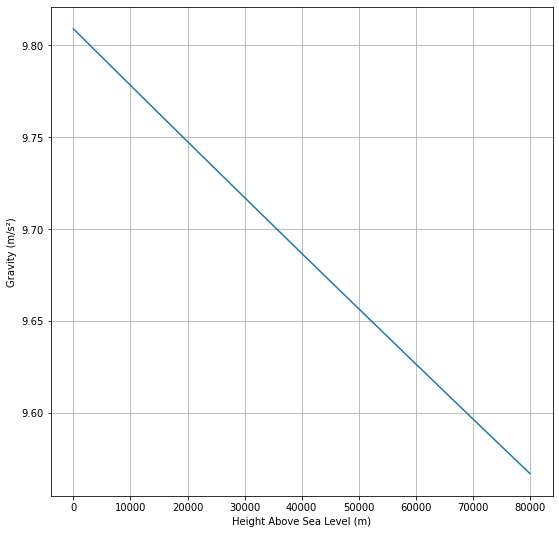



Atmospheric Model Plots


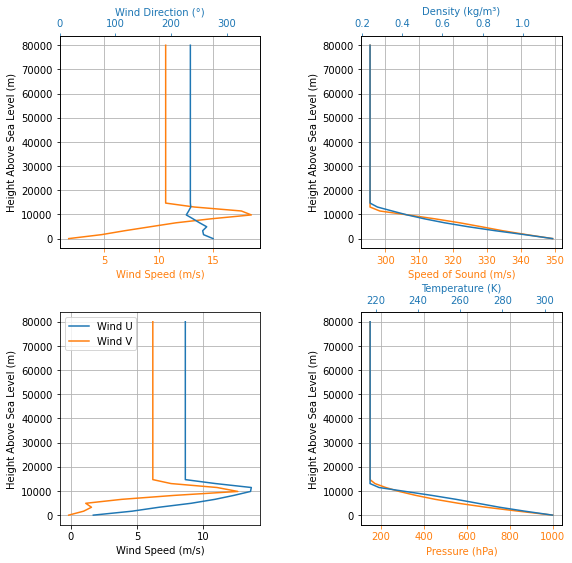

In [41]:
EnvICONEU.all_info()

### Using Ensemble Forecasts and Reanalysis

Ensemble weather forecasts and reanalysis can also be imported. Since ensembles are just a gathering of multiple weather predictions, they are great for dispersion analysis and Monte Carlo simulations. One member forecast of the ensemble can be selected to run each flight simulation.

Two global ensembles are available by default: GEFS and CMC Ensemble, but others can also be used. To showcase another example, an ERA5 Reanalysis ensemble will also be shown.

#### GEFS

In [42]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
date_info = (tomorrow.year, tomorrow.month, tomorrow.day, 12)  # Hour given in UTC time

EnvGEFS = Environment(
    date=date_info,
    latitude=-21.960641,
    longitude=-47.482122,
    elevation=640,
)

In [43]:
EnvGEFS.set_atmospheric_model(type="Ensemble", file="GEFS")

By default, the 0th forecast member is activated, which means that using EnvGFS will be exactly the same as using the 0th forecast member, and all other forecasts are kept away stored. Changing this is as easy as the following line of code.

In [44]:
EnvGEFS.select_ensemble_member(1)

Now, a new forecast is active and EnvGFS behaves as if ensemble member 1 was its only forecast.

A very useful thing is to compare the forecast of all ensemble members, as well as confirming how many are there. All of this can be done by using Environment.all_info().


Gravity Details

Acceleration of Gravity at Lauch Site: 9.785575094392566 m/s²


Launch Site Details

Launch Date: 2023-08-12 12:00:00 UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 243664.48 W    7569452.20 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 31.184 km
Ensemble Time Period: From  2023-08-11 12:00:00  to  2023-08-27 12:00:00  UTC
Ensemble Hour Interval: 6  hrs
Ensemble Latitude Range: From  -90.0 ° To  90.0 °
Ensemble Longitude Range: From  0.0 ° To  359.5 °
Number of Ensemble Members: 21
Selected Ensemble Member: 1  (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 2.09 m/s
Surface Wind Direction: 30.01°
Surface Wind Heading: 210.01°
Surface Pressure: 947.13 hPa
Surface Temperature: 297.20 K
Surface Air Density: 1.110 kg/m³
Surface Speed of Sound: 345.60 m/s



Gravity

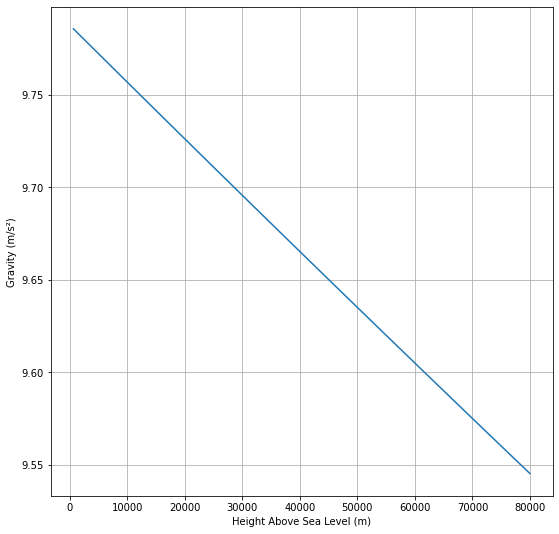



Atmospheric Model Plots


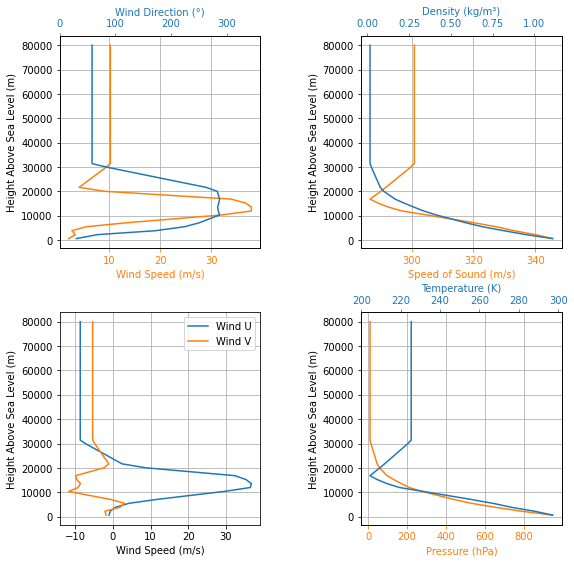



Ensemble Members Comparison


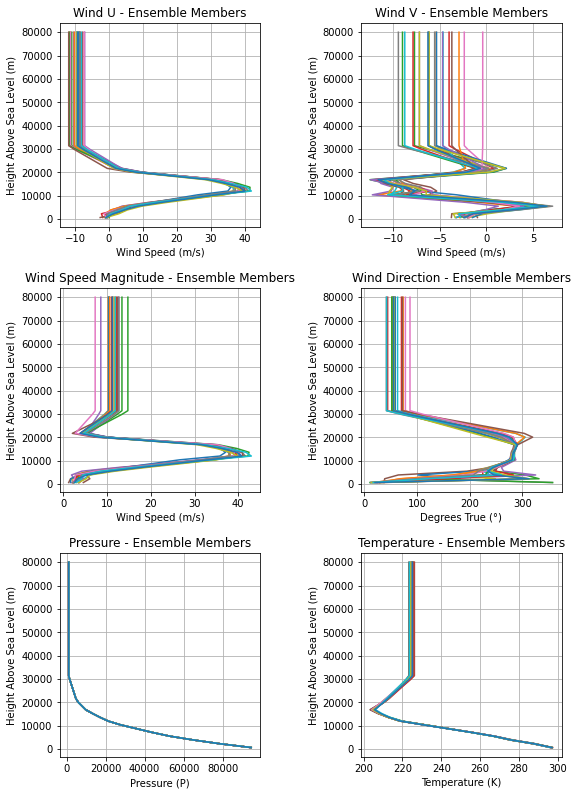

In [45]:
EnvGEFS.all_info()

#### CMC Ensemble

In [46]:
EnvCMC = Environment(
    date=date_info,
    latitude=-21.960641,
    longitude=-47.482122,
    elevation=640,
)

In [ ]:
EnvCMC.set_atmospheric_model(type="Ensemble", file="CMC")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.785575094392566 m/s²


Launch Site Details

Launch Date: 2023-08-12 12:00:00 UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 243664.48 W    7569452.20 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 31.199 km
Ensemble Time Period: From  2023-08-11 12:00:00  to  2023-08-27 12:00:00  UTC
Ensemble Hour Interval: 6  hrs
Ensemble Latitude Range: From  -90.0 ° To  90.0 °
Ensemble Longitude Range: From  0.0 ° To  359.5 °
Number of Ensemble Members: 21
Selected Ensemble Member: 0  (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 6.05 m/s
Surface Wind Direction: 31.30°
Surface Wind Heading: 211.30°
Surface Pressure: 944.91 hPa
Surface Temperature: 295.75 K
Surface Air Density: 1.113 kg/m³
Surface Speed of Sound: 344.75 m/s



Gravity

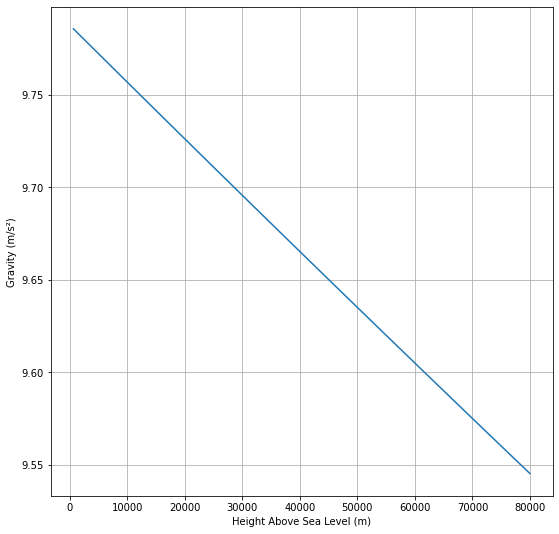



Atmospheric Model Plots


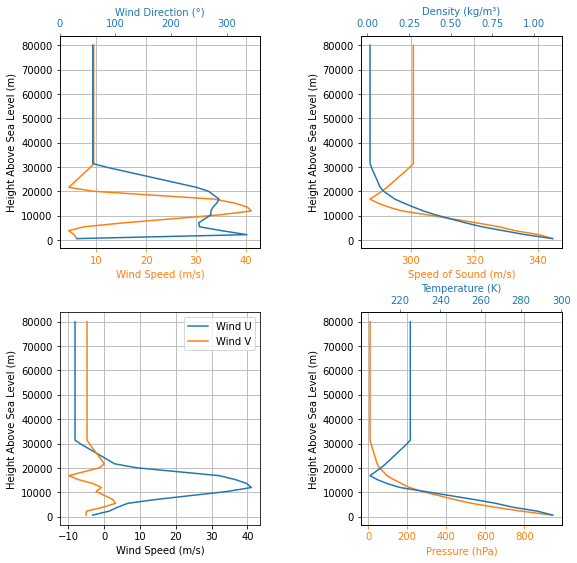



Ensemble Members Comparison


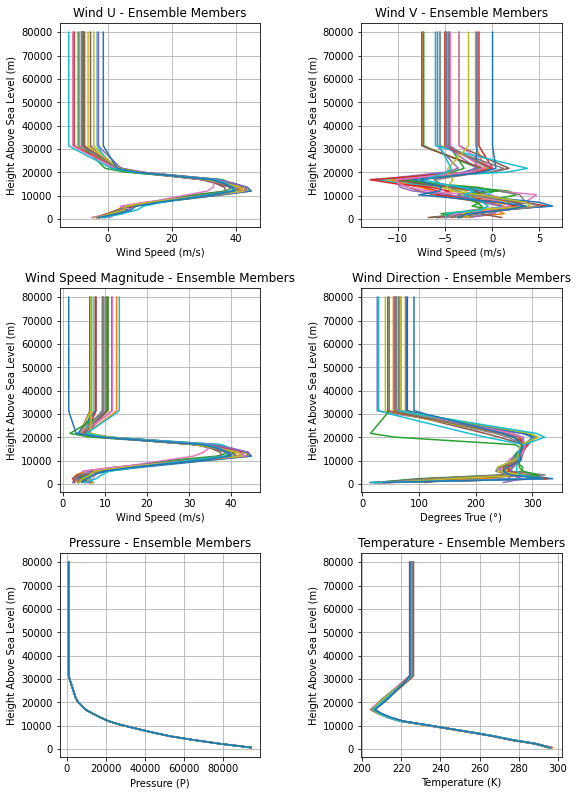

In [48]:
EnvCMC.all_info()

#### ERA5 Ensemble

In [49]:
EnvERA5 = Environment(date=(2018, 2, 17, 18), latitude=-21.960641, longitude=-47.482122)

In [ ]:
EnvERA5.set_atmospheric_model(
    type="Ensemble",
    file="../../../data/weather/CuritibaRioSaoPauloEnsemble_2018_ERA-5.nc",
    dictionary="ECMWF",
)

In [ ]:
EnvERA5.all_info()